In [17]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import utils
import cv2

In [19]:
# load the image and convert it from BGR to RGB so that
# we can dispaly it with matplotlib

def GetColor(pic_name,cluster_number):
    image = cv2.imread(pic_name)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # show our image
    plt.figure()
    plt.axis("off")
    plt.imshow(image)
    
    #print rgb
    image = image.reshape((image.shape[0] * image.shape[1], 3))
    clt = KMeans(n_clusters = cluster_number)
    clt.fit(image)
    print(clt.cluster_centers_)
    return(clt.cluster_centers_)

In [ ]:
#white - 255,255,255
#black - 0,0,0

In [6]:
import requests

def DownloadPNG(image_url,name):
    img_data = requests.get(image_url).content
    with open(name, 'wb') as handler:
        handler.write(img_data)

In [21]:
from lxml import html

def UrlToTree(url): #https://www.theory.com/womens-dresses/
    r = requests.get(url, allow_redirects=True)
    open('temp.html', 'wb').write(r.content)
    tree = html.parse('temp.html')
    return tree

def TreeToSrc(tree,number):#1-240211
    image_url = tree.xpath("//div[3]/div[1]/div/div/div/a/img/@src")[number]
    image_url = "https:" + image_url
    return image_url

def GetSrcLength(tree):
    number = len(tree.xpath("//div[3]/div[1]/div/div/div/a/img/@src"))
    return number

def GetTexture(tree,number): #Color,Texture,Pattern,Cut,Neck,Score
    caption = tree.xpath(r"//a[@class='name-link js-track-gtm-pid']/text()")[number]
    print(caption)
    return caption

[[229.00946679 228.06432151 225.54384008]
 [ 44.61085056  42.36807209  51.74048062]]

Good Wool Pinstripe Blazer Dress

[[230.42294588 227.8477155  226.07116603]
 [ 37.59616881  33.24310933  32.25620102]]

Tweed Peplum Dress

[[235.49957019 234.91285771 233.40391596]
 [ 61.61297724  55.35898763  50.73697014]]

Polka-Dot Deep V Easy Midi Dress

[[230.71071968 227.62652959 225.83883108]
 [ 53.67900681  46.95102303  45.00358492]]

Striped Knit Shell Dress

[[221.37887446 220.68193249 217.52102736]
 [187.82442875  66.36299301  46.9586901 ]]

Kimono Dress

[[235.83503033 233.54937275 230.95962313]
 [207.85054017  75.23541372  34.64588726]]

Good Linen Panel Shift Dress

[[234.85614468 236.92576326 234.85158887]
 [102.62761432  80.72285242  68.45515775]]

Silk Charmeuse Bodice Drape Dress

[[225.39500569 222.09218493 219.96740647]
 [ 45.44252771  39.7775193   40.80963459]]

Good Wool Shift Dress

[[234.09942793 233.37895278 232.02276779]
 [ 72.02253641  82.34454619 128.88374769]]

Double Str

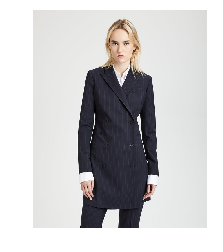

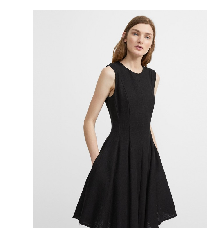

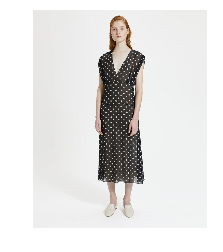

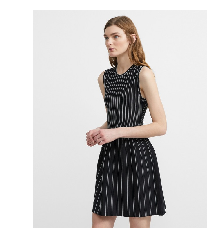

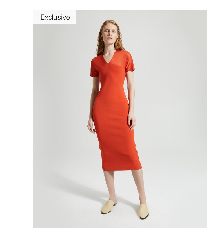

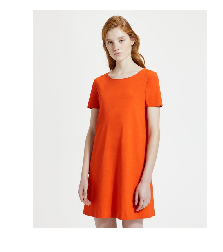

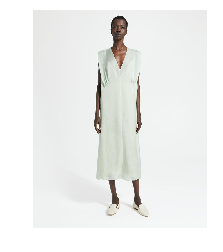

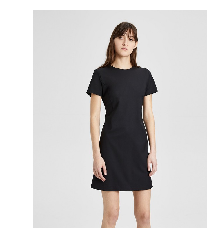

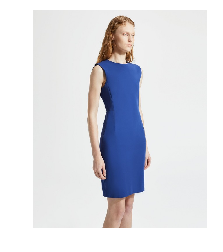

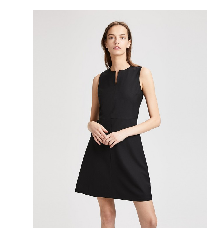

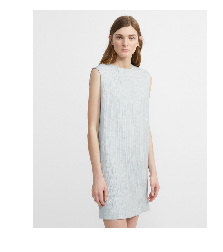

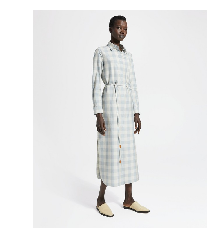

In [22]:
url = "https://www.theory.com/womens-dresses/"
name = 'dress'
tree=UrlToTree(url)
number=GetSrcLength(tree)
for i in range(number):
    DownloadPNG(TreeToSrc(tree,i),name+str(i)+'.png')
    GetColor(name+str(i)+'.png',2)
    GetTexture(tree,i)